In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [77]:
RANDOM_STATE = 39

In [78]:
data_df = pd.read_csv("../WineQT.csv")

In [79]:
data_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [80]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [81]:
data_df.drop("Id", axis = 1, inplace = True)

In [82]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [83]:
data_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [84]:
data_df.quality.value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

[Text(0, 0, '6'),
 Text(0, 0, '33'),
 Text(0, 0, '483'),
 Text(0, 0, '462'),
 Text(0, 0, '143'),
 Text(0, 0, '16')]

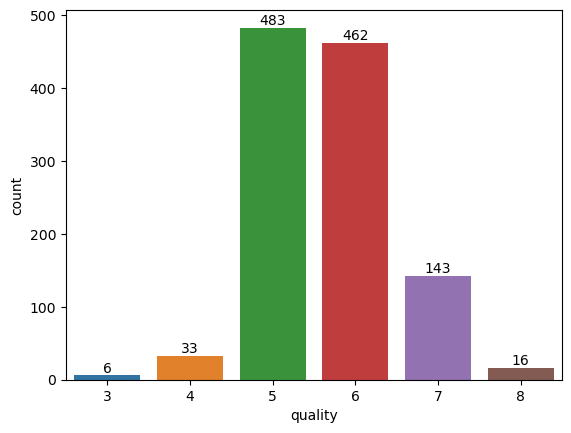

In [86]:
ax = sns.countplot(x = "quality", data = data_df)
ax.bar_label(ax.containers[0])

We can see from above plot, that the data is highly imbalanced. So, we are going to merge the data of quality 3 and quality 4. Also quality 7 and 8 will me merged.

In [88]:
def wineQualityTransform(quality):
    wine_quality_transformation = {3: 0, 4: 0, 5:1, 6:2, 7: 3, 8: 3}
    return wine_quality_transformation[quality]

data_df["quality"] = data_df["quality"].apply(wineQualityTransform)
print(data_df.quality.value_counts())


1    483
2    462
3    159
0     39
Name: quality, dtype: int64


[Text(0, 0, '39'), Text(0, 0, '483'), Text(0, 0, '462'), Text(0, 0, '159')]

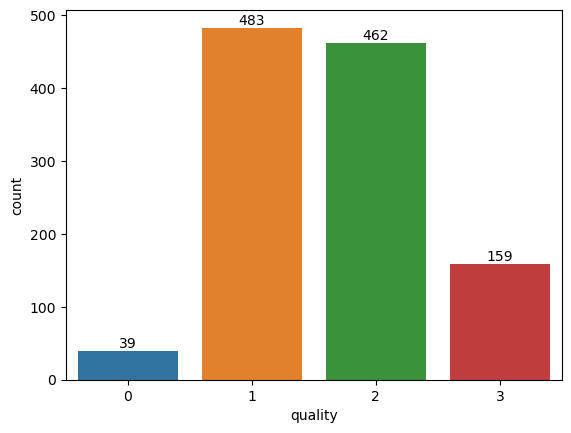

In [89]:
ax = sns.countplot(x = "quality", data = data_df)
ax.bar_label(ax.containers[0])

So, we still have highly imbalanced data. For the handling of imbalanced data, we are going to use various methods like oversampling, undersampling, smote and class weights.

In [90]:
from sklearn.model_selection import train_test_split

X = data_df.drop("quality", axis = 1)
y = data_df.quality

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify = y)
X_test, X_val, y_test, y_val = train_test_split(X_val, y_val, test_size=0.5, random_state=RANDOM_STATE, stratify = y_val)

In [93]:
def qualityBarplot(qualitySeries):
    count_calc = qualitySeries.value_counts()
    print(count_calc)
    f, ax = plt.subplots(1, 1, figsize = (10, 5))
    g = sns.barplot(x = count_calc.index, y = count_calc, ax = ax)
    g.set(xlabel = "quality", ylabel = "count")
    g.bar_label(g.containers[0])

1    386
2    370
3    127
0     31
Name: quality, dtype: int64
1    49
2    46
3    16
0     4
Name: quality, dtype: int64
1    48
2    46
3    16
0     4
Name: quality, dtype: int64


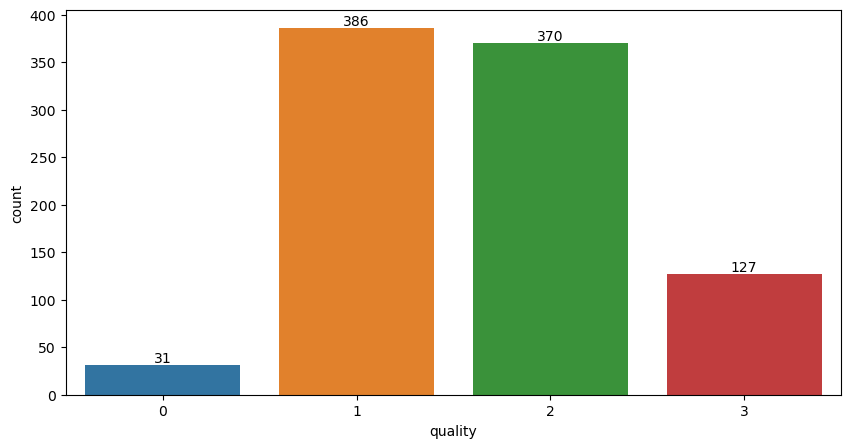

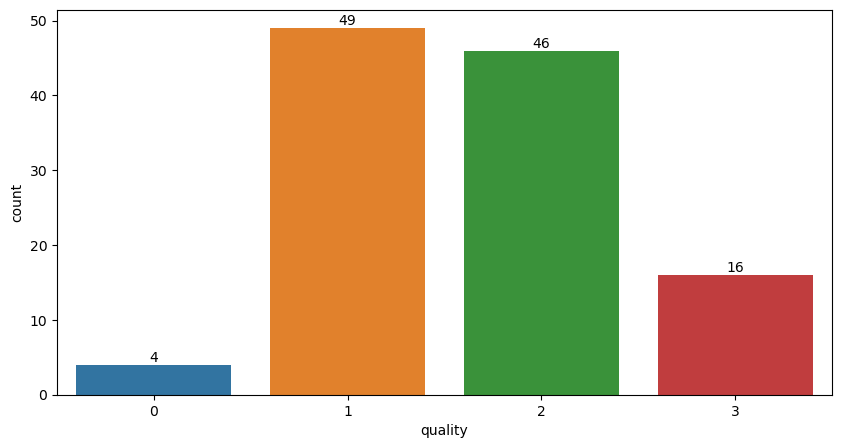

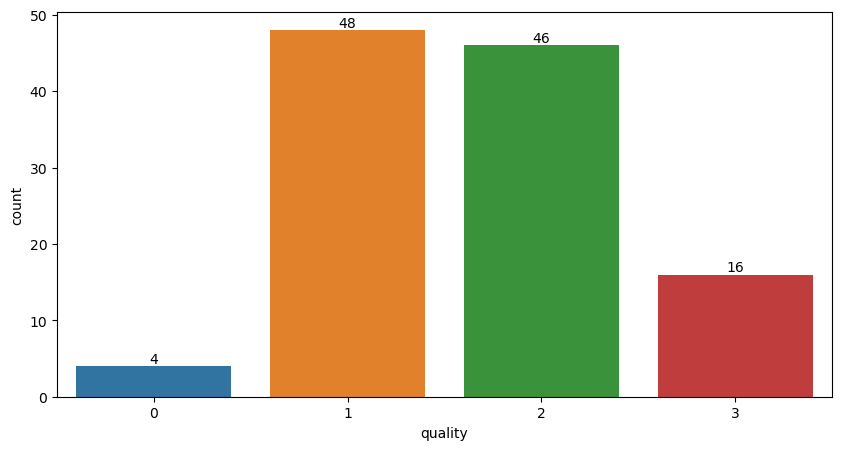

In [94]:
qualityBarplot(y_train)
qualityBarplot(y_val)
qualityBarplot(y_test)